In [1]:
# Initialize constants and directories

taper_hup_ids = [160, 172, 145, 138, 142, 151, 187, 180, 184, 173, 223, 177, 185, 166]
TABLES_DIRECTORY = "../../Data/giant_new_tables"
rows_per_day = 720

In [2]:
# import numpy as np
# import pandas as pd
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns


# def z_score_normalize(data):
#     """Standardize data using z-score normalization."""
#     mean_val = np.mean(data)
#     std_val = np.std(data)
#     return [(x - mean_val) / std_val for x in data]


# def get_taper_period_data(patient_id, TABLES_DIRECTORY):
#     hourly_patient_features_df = pd.read_csv(
#         os.path.join(TABLES_DIRECTORY, f"HUP_{str(patient_id)}.csv")
#     )

#     taper_start_idx = hourly_patient_features_df[
#         ~hourly_patient_features_df["synchrony_broadband"].isna()
#     ].index[
#         0
#     ]  # Add 90 rows to offset by 3 hours
#     taper_end_idx = hourly_patient_features_df[
#         hourly_patient_features_df["had_seizure"] >= 1
#     ].index[0]

#     return hourly_patient_features_df.loc[taper_start_idx:taper_end_idx]


# def get_day_avgs(taper_period, rows_per_day):
#     days = len(taper_period) // rows_per_day + 1
#     day_avgs = []
#     for i in range(days):
#         day_data = taper_period["synchrony_broadband"].iloc[
#             i * rows_per_day : (i + 1) * rows_per_day
#         ]
#         day_data = day_data[day_data < day_data.quantile(0.95)]
#         day_avgs.append(np.nanmean(day_data))
#     return day_avgs


# # Collect all patient's day averages and standardize them

# all_day_avgs_standardized = {}
# for patient_id in taper_hup_ids:
#     taper_period = get_taper_period_data(patient_id, TABLES_DIRECTORY)
#     day_avgs = get_day_avgs(taper_period, rows_per_day)
#     standardized_day_avgs = z_score_normalize(day_avgs)
#     all_day_avgs_standardized[patient_id] = standardized_day_avgs

# # Plotting on a normalized axis

# plt.figure(figsize=(10, 6))

# for patient_id, day_avgs in all_day_avgs_standardized.items():
#     normalized_days = np.linspace(0, 100, len(day_avgs))
#     plt.plot(normalized_days, day_avgs, label=f"Patient {patient_id}")

# plt.xlabel("Normalized Tapering Time (%)")
# plt.ylabel("Standardized Average Synchrony (Z-score)")
# plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
# plt.show()

In [3]:
# from scipy.stats import linregress

# # ... [rest of your functions remain unchanged]

# # Compute the aggregate curve and standard error for each normalized time point
# max_normalized_days = max(
#     [len(day_avgs) for day_avgs in all_day_avgs_standardized.values()]
# )
# aggregate_curve = np.zeros(max_normalized_days)
# standard_errors = np.zeros(max_normalized_days)
# counts = np.zeros(max_normalized_days)

# # Aggregate data
# for day_avgs in all_day_avgs_standardized.values():
#     for idx, value in enumerate(day_avgs):
#         aggregate_curve[idx] += value
#         counts[idx] += 1

# # Calculate mean
# aggregate_curve /= counts

# # Calculate standard error
# for day_avgs in all_day_avgs_standardized.values():
#     for idx, value in enumerate(day_avgs):
#         standard_errors[idx] += (value - aggregate_curve[idx]) ** 2
# standard_errors = np.sqrt(standard_errors / counts) / np.sqrt(counts)

# # Plotting
# plt.figure(figsize=(4, 4))

# # Plot each patient's standardized curve
# for patient_id, day_avgs in all_day_avgs_standardized.items():
#     normalized_days = np.linspace(0, 100, len(day_avgs))
#     plt.plot(
#         normalized_days, day_avgs, color="lightgray", alpha=0.5
#     )  # Use a light color and make it semi-transparent

# # Plot the aggregate curve
# normalized_days = np.linspace(0, 100, max_normalized_days)
# plt.plot(
#     normalized_days, aggregate_curve, label="Average Curve", color="blue", linewidth=2
# )

# # Shade the standard error region
# plt.fill_between(
#     normalized_days,
#     aggregate_curve - standard_errors,
#     aggregate_curve + standard_errors,
#     color="blue",
#     alpha=0.2,
# )

# # Linear regression on aggregate curve
# slope, intercept, r_value, p_value, std_err = linregress(
#     normalized_days, aggregate_curve
# )
# plt.plot(
#     normalized_days,
#     intercept + slope * normalized_days,
#     "r",
#     label="Linear Trend",
#     linewidth=2,
# )

# # Print out the statistics
# print(f"Slope (Regression Coefficient): {slope:.4f}")
# print(f"Intercept: {intercept:.4f}")
# print(f"R-value (Correlation Coefficient): {r_value:.4f}")
# print(f"P-value: {p_value:.5f}")
# print(f"Standard Error: {std_err:.4f}")

# plt.xlabel("Normalized Tapering Time (%)")
# plt.ylabel("Standardized Average Synchrony (Z-score)")
# plt.legend()
# plt.show()

In [4]:
# from scipy.stats import linregress


# def get_day_avgs(patient_id, TABLES_DIRECTORY):
#     taper_data = get_taper_period_data(patient_id, TABLES_DIRECTORY)
#     rows_per_day = 720
#     day_avgs = []
#     days = len(taper_data) // rows_per_day + 1
#     for i in range(days):
#         day_data = taper_data["synchrony_broadband"].iloc[
#             i * rows_per_day : (i + 1) * rows_per_day
#         ]
#         day_data = day_data[day_data < day_data.quantile(0.95)]
#         day_avgs.append(np.nanmean(day_data))
#     return day_avgs


# all_day_avgs = {}
# for patient_id in taper_hup_ids:
#     all_day_avgs[patient_id] = get_day_avgs(patient_id, TABLES_DIRECTORY)


# def compute_min_max_normalized_day_avgs(day_avgs):
#     min_val = min(day_avgs)
#     max_val = max(day_avgs)
#     return [(x - min_val) / (max_val - min_val) for x in day_avgs]


# # Compute min-max normalized values for all patients
# all_day_avgs_normalized = {}
# for patient_id, day_avgs in all_day_avgs.items():
#     all_day_avgs_normalized[patient_id] = compute_min_max_normalized_day_avgs(day_avgs)

# # Compute the aggregate curve and standard error for each normalized time point
# max_normalized_days = max(
#     [len(day_avgs) for day_avgs in all_day_avgs_normalized.values()]
# )
# aggregate_curve = np.zeros(max_normalized_days)
# standard_errors = np.zeros(max_normalized_days)
# counts = np.zeros(max_normalized_days)

# # Aggregate data
# for day_avgs in all_day_avgs_normalized.values():
#     for idx, value in enumerate(day_avgs):
#         aggregate_curve[idx] += value
#         counts[idx] += 1

# # Calculate mean
# aggregate_curve /= counts

# # Calculate standard error
# for day_avgs in all_day_avgs_normalized.values():
#     for idx, value in enumerate(day_avgs):
#         standard_errors[idx] += (value - aggregate_curve[idx]) ** 2
# standard_errors = np.sqrt(standard_errors / counts) / np.sqrt(counts)

# # Plotting
# plt.figure(figsize=(12, 8))

# # Plot each patient's normalized curve
# for patient_id, day_avgs in all_day_avgs_normalized.items():
#     normalized_days = np.linspace(0, 100, len(day_avgs))
#     plt.plot(
#         normalized_days, day_avgs, color="lightgray", alpha=0.5
#     )  # Use a light color and make it semi-transparent

# # Plot the aggregate curve
# normalized_days = np.linspace(0, 100, max_normalized_days)
# plt.plot(
#     normalized_days, aggregate_curve, label="Average Curve", color="blue", linewidth=2
# )

# # Shade the standard error region
# plt.fill_between(
#     normalized_days,
#     aggregate_curve - standard_errors,
#     aggregate_curve + standard_errors,
#     color="blue",
#     alpha=0.2,
# )

# # Linear regression on aggregate curve
# slope, intercept, r_value, p_value, std_err = linregress(
#     normalized_days, aggregate_curve
# )
# plt.plot(
#     normalized_days,
#     intercept + slope * normalized_days,
#     "r",
#     label="Linear Trend",
#     linewidth=2,
# )

# # Print out the statistics
# print(f"Slope (Regression Coefficient): {slope:.4f}")
# print(f"Intercept: {intercept:.4f}")
# print(f"R-value (Correlation Coefficient): {r_value:.4f}")
# print(f"P-value: {p_value:.5f}")
# print(f"Standard Error: {std_err:.4f}")

# plt.xlabel("Normalized Tapering Time (%)")
# plt.ylabel("Min-Max Normalized Average Synchrony")
# plt.legend()
# plt.show()

In [5]:
# import pandas as pd
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# import seaborn as sns

# WINDOW_SIZE = 12 * 30  # 12 hours in 2-minute segments
# all_data = {}
# TABLES_DIRECTORY = "../../Data/giant_new_tables"

# for patient_hup_id in taper_hup_ids:
#     hourly_patient_features_df = pd.read_csv(
#         os.path.join(TABLES_DIRECTORY, f"HUP_{str(patient_hup_id)}.csv")
#     )

#     # Limit the dataframe to rows before the first seizure
#     first_seizure_idx = hourly_patient_features_df[
#         hourly_patient_features_df["had_seizure"] >= 1
#     ].index[0]
#     hourly_patient_features_df = hourly_patient_features_df.loc[:first_seizure_idx]

#     # Find the start of the tapering period using the first non-NaN synchrony value
#     taper_start_idx = hourly_patient_features_df[
#         ~hourly_patient_features_df["synchrony_broadband"].isna()
#     ].index[0]

#     # Determine the initial medication load
#     initial_med_load = (
#         hourly_patient_features_df["med_sum_no_lorazepam_raw"]
#         .iloc[taper_start_idx : taper_start_idx + (WINDOW_SIZE)]
#         .mean()
#     )

#     percent_tapered = []
#     avg_synchrony = []

#     for start_idx in range(taper_start_idx, first_seizure_idx - WINDOW_SIZE + 1):
#         end_idx = start_idx + WINDOW_SIZE
#         window_med_load = (
#             hourly_patient_features_df["med_sum_no_lorazepam_raw"]
#             .iloc[start_idx:end_idx]
#             .mean()
#         )

#         # Skip windows with average medication load higher than the initial_med_load
#         if window_med_load > initial_med_load:
#             continue

#         percent_tapered_val = (1 - window_med_load / initial_med_load) * 100
#         avg_synchrony_val = (
#             hourly_patient_features_df["synchrony_broadband"]
#             .iloc[start_idx:end_idx]
#             .mean()
#         )

#         percent_tapered.append(percent_tapered_val)
#         avg_synchrony.append(avg_synchrony_val)

#     if percent_tapered:  # Ensure data is present
#         all_data[patient_hup_id] = {
#             "percent_tapered": pd.Series(percent_tapered, dtype="float64"),
#             "avg_synchrony": pd.Series(avg_synchrony, dtype="float64"),
#         }

# # Plotting
# plt.figure(figsize=(12, 8))

# # Plot each patient's curve
# max_percent = 0
# for patient_id, data in all_data.items():
#     if (
#         not data["percent_tapered"].isnull().all()
#         and not data["avg_synchrony"].isnull().all()
#     ):
#         plt.plot(
#             data["percent_tapered"], data["avg_synchrony"], color="lightgray", alpha=0.5
#         )
#         max_percent = max(max_percent, max(data["percent_tapered"]))

# # Aggregate data for the average curve
# aggregate_percent = np.linspace(0, max_percent, 200)
# aggregate_synchrony = []

# for percent in aggregate_percent:
#     values_at_percent = [
#         data["avg_synchrony"].iloc[
#             np.argmin(np.abs(np.array(data["percent_tapered"]) - percent))
#         ]
#         for patient_id, data in all_data.items()
#         if not data["percent_tapered"].empty and max(data["percent_tapered"]) > percent
#     ]
#     aggregate_synchrony.append(np.nanmean(values_at_percent))

# plt.plot(aggregate_percent, aggregate_synchrony, color="blue", linewidth=2)

# # Regression statistics for the aggregate curve
# X = sm.add_constant(aggregate_percent)
# model = sm.OLS(aggregate_synchrony, X, missing="drop")
# results = model.fit()
# print(results.summary())

# plt.xlabel("Percentage Tapered")
# plt.ylabel("Average Synchrony")
# plt.title("Synchrony vs. Medication Taper Percentage")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [6]:
# import pandas as pd
# import numpy as np
# import os
# import matplotlib.pyplot as plt
# import statsmodels.api as sm

# WINDOW_SIZE = 12 * 30  # 12 hours in 2-minute segments
# all_data = {}
# TABLES_DIRECTORY = "../../Data/giant_new_tables"

# max_percentages = []

# for patient_hup_id in taper_hup_ids:
#     print(patient_hup_id)
#     hourly_patient_features_df = pd.read_csv(
#         os.path.join(TABLES_DIRECTORY, f"HUP_{str(patient_hup_id)}.csv")
#     )

#     # Limit the dataframe to rows before the first seizure
#     first_seizure_idx = hourly_patient_features_df[
#         hourly_patient_features_df["had_seizure"] >= 1
#     ].index[0]
#     hourly_patient_features_df = hourly_patient_features_df.loc[:first_seizure_idx]

#     # Find the start of the tapering period using the first non-NaN synchrony value
#     taper_start_idx = hourly_patient_features_df[
#         ~hourly_patient_features_df["synchrony_broadband"].isna()
#     ].index[0]

#     # Determine the initial medication load
#     initial_med_load = (
#         hourly_patient_features_df["med_sum_no_lorazepam_raw"]
#         .iloc[taper_start_idx : taper_start_idx + (12 * 30)]
#         .mean()
#     )

#     percent_tapered = []
#     avg_synchrony = []

#     for start_idx in range(taper_start_idx, first_seizure_idx - WINDOW_SIZE + 1):
#         end_idx = start_idx + WINDOW_SIZE
#         window_med_load = (
#             hourly_patient_features_df["med_sum_no_lorazepam_raw"]
#             .iloc[start_idx:end_idx]
#             .mean()
#         )

#         # Skip windows with average medication load higher than the initial_med_load
#         if window_med_load > initial_med_load:
#             continue

#         percent_tapered_val = (1 - window_med_load / initial_med_load) * 100
#         avg_synchrony_val = (
#             hourly_patient_features_df["synchrony_broadband"]
#             .iloc[start_idx:end_idx]
#             .mean()
#         )

#         percent_tapered.append(percent_tapered_val)
#         avg_synchrony.append(avg_synchrony_val)

#     if len(percent_tapered) > 1:  # Ensure data is present
#         all_data[patient_hup_id] = {
#             "percent_tapered": pd.Series(percent_tapered, dtype="float64"),
#             "avg_synchrony": pd.Series(avg_synchrony, dtype="float64"),
#         }
#         print(percent_tapered)
#         max_percentages.append(max(percent_tapered))

# # Find the smallest of the maximum tapering percentages across all patients
# max_taper_percent = min(max_percentages)

# # Plot the individual patient curves
# for patient_id, data in all_data.items():
#     plt.plot(
#         data["percent_tapered"], data["avg_synchrony"], color="lightgray", alpha=0.5
#     )

# # Aggregate data for the average curve
# aggregate_percent = np.linspace(0, max_taper_percent, 100)
# aggregate_synchrony = []

# for percent in aggregate_percent:
#     values_at_percent = [
#         data["avg_synchrony"].iloc[
#             np.argmin(np.abs(np.array(data["percent_tapered"]) - percent))
#         ]
#         for patient_id, data in all_data.items()
#         if max(data["percent_tapered"]) > percent
#     ]
#     aggregate_synchrony.append(np.nanmean(values_at_percent))

# plt.plot(aggregate_percent, aggregate_synchrony, color="blue", linewidth=2)
# plt.xlim(0, max_taper_percent)
# plt.ylim(0, 0.2)
# plt.xlabel("Percentage Tapered")
# plt.ylabel("Average Synchrony")
# plt.title("Synchrony vs. Medication Tapering Percentage")
# plt.show()

# # Regression statistics for the aggregate curve
# x_vals = sm.add_constant(aggregate_percent)
# model = sm.OLS(aggregate_synchrony, x_vals, missing="drop")
# results = model.fit()
# print(results.summary())

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

WINDOW_SIZE = 12 * 30  # 12 hours in 2-minute segments
all_data = {}
all_percentages = []
all_synchronies = []

TABLES_DIRECTORY = "../../Data/giant_new_tables"

# for patient_hup_id in taper_hup_ids:
#     hourly_patient_features_df = pd.read_csv(
#         os.path.join(TABLES_DIRECTORY, f"HUP_{str(patient_hup_id)}.csv")
#     )

#     # Limit the dataframe to rows before the first seizure
#     first_seizure_idx = hourly_patient_features_df[
#         hourly_patient_features_df["had_seizure"] >= 1
#     ].index[0]
#     hourly_patient_features_df = hourly_patient_features_df.loc[:first_seizure_idx]

#     # Find the start of the tapering period using the first non-NaN synchrony value
#     taper_start_idx = hourly_patient_features_df[
#         ~hourly_patient_features_df["synchrony_broadband"].isna()
#     ].index[0]

#     # Determine the initial medication load
#     initial_med_load = (
#         hourly_patient_features_df["med_sum_no_lorazepam_raw"]
#         .iloc[taper_start_idx : taper_start_idx + (WINDOW_SIZE)]
#         .mean()
#     )

#     percent_tapered = []
#     avg_synchrony = []

#     for start_idx in range(taper_start_idx, first_seizure_idx - WINDOW_SIZE + 1):
#         end_idx = start_idx + WINDOW_SIZE
#         window_med_load = (
#             hourly_patient_features_df["med_sum_no_lorazepam_raw"]
#             .iloc[start_idx:end_idx]
#             .mean()
#         )

#         # Skip windows with average medication load higher than the initial_med_load
#         if window_med_load > initial_med_load:
#             continue

#         percent_tapered_val = (1 - window_med_load / initial_med_load) * 100
#         avg_synchrony_val = (
#             hourly_patient_features_df["synchrony_broadband"]
#             .iloc[start_idx:end_idx]
#             .mean()
#         )

#         percent_tapered.append(percent_tapered_val)
#         avg_synchrony.append(avg_synchrony_val)

#     if percent_tapered:  # Ensure data is present
#         all_data[patient_hup_id] = {
#             "percent_tapered": pd.Series(percent_tapered, dtype="float64"),
#             "avg_synchrony": pd.Series(avg_synchrony, dtype="float64"),
#         }
#         all_percentages.extend(percent_tapered)
#         all_synchronies.extend(avg_synchrony)

# # Group data into 5% bins
# bins = np.arange(0, 105, 5)
# labels = [f"{i}-{i+4}" for i in range(0, 100, 5)]
# df = pd.DataFrame(
#     {"Percentage Tapered": all_percentages, "Average Synchrony": all_synchronies}
# )
# df["Binned Percentage"] = pd.cut(
#     df["Percentage Tapered"], bins=bins, labels=labels, right=False
# )

# # Calculate mean and standard deviation for each bin
# grouped_means = (
#     df.groupby("Binned Percentage")["Average Synchrony"].mean().reset_index()
# )
# grouped_std = df.groupby("Binned Percentage")["Average Synchrony"].std().reset_index()

# # Plotting using seaborn
# plt.figure(figsize=(12, 6))
# sns.barplot(
#     x="Binned Percentage",
#     y="Average Synchrony",
#     data=grouped_means,
#     yerr=grouped_std["Average Synchrony"],
#     palette="Blues_d",
# )
# plt.title("Average Synchrony vs. Percentage Tapered")
# plt.tight_layout()
# plt.show()

/tmp/ipykernel_42806/1773530624.py:40: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  "percent_tapered": pd.Series(percent_tapered),
/tmp/ipykernel_42806/1773530624.py:41: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  "avg_synchrony": pd.Series(avg_synchrony),


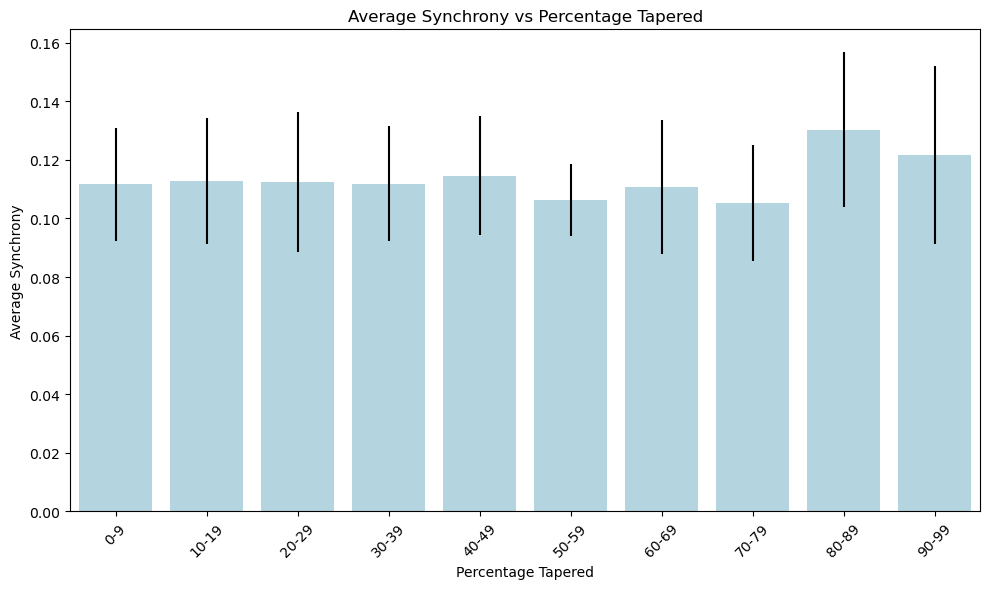

In [10]:
all_data = {}

for patient_hup_id in taper_hup_ids:
    hourly_patient_features_df = pd.read_csv(
        os.path.join(TABLES_DIRECTORY, f"HUP_{str(patient_hup_id)}.csv")
    )

    # Filter rows up to first seizure
    seizure_idx = hourly_patient_features_df[
        hourly_patient_features_df["had_seizure"] >= 1
    ].index[0]
    hourly_patient_features_df = hourly_patient_features_df.loc[:seizure_idx]

    # Determine the initial medication load
    synchrony_available = hourly_patient_features_df[
        ~hourly_patient_features_df["synchrony_broadband"].isna()
    ]
    first_synchrony_index = synchrony_available.index[0]
    initial_med_load = (
        hourly_patient_features_df["med_sum_no_lorazepam_raw"]
        .iloc[first_synchrony_index : first_synchrony_index + (WINDOW_SIZE // 8)]
        .mean()
    )

    percent_tapered = []
    avg_synchrony = []

    for i in range(0, len(hourly_patient_features_df) - WINDOW_SIZE, WINDOW_SIZE // 2):
        window_data = hourly_patient_features_df.iloc[i : i + WINDOW_SIZE]
        current_med_load = window_data["med_sum_no_lorazepam_raw"].mean()

        # Discard windows with a higher average medication load than the initial load
        if current_med_load > initial_med_load:
            continue

        percent_tapered.append((1 - current_med_load / initial_med_load) * 100)
        avg_synchrony.append(window_data["synchrony_broadband"].mean())

    all_data[patient_hup_id] = {
        "percent_tapered": pd.Series(percent_tapered),
        "avg_synchrony": pd.Series(avg_synchrony),
    }

# Binning the data and computing average synchrony and its standard deviation for each bin
bins = list(range(0, 110, 10))
bin_labels = [f"{i}-{i+9}" for i in range(0, 100, 10)]
bin_centers = [(i + i + 9) / 2 for i in range(0, 100, 10)]

all_percent_tapered = []
all_avg_synchrony = []

for _, data in all_data.items():
    all_percent_tapered.extend(data["percent_tapered"])
    all_avg_synchrony.extend(data["avg_synchrony"])

df = pd.DataFrame(
    {"percent_tapered": all_percent_tapered, "avg_synchrony": all_avg_synchrony}
)
df["bin"] = pd.cut(df["percent_tapered"], bins=bins, labels=bin_labels, right=False)

# Dropping outliers using 1.5 * IQR rule
for bin_label in bin_labels:
    bin_data = df[df["bin"] == bin_label]["avg_synchrony"]
    Q1 = bin_data.quantile(0.25)
    Q3 = bin_data.quantile(0.75)
    IQR = Q3 - Q1

    filter = (bin_data >= Q1 - 1.5 * IQR) & (bin_data <= Q3 + 1.5 * IQR)
    df.loc[df["bin"] == bin_label, "avg_synchrony"] = bin_data[filter]

grouped = df.groupby("bin").agg(
    avg_synchrony=("avg_synchrony", "mean"), std_dev=("avg_synchrony", "std")
)

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    x=bin_centers,
    y=grouped["avg_synchrony"],
    yerr=grouped["std_dev"],
    color="lightblue",
    ecolor="black",
    capsize=5,
)
plt.xlabel("Percentage Tapered")
plt.ylabel("Average Synchrony")
plt.xticks(ticks=range(len(bin_centers)), labels=bin_labels, rotation=45)
plt.title("Average Synchrony vs Percentage Tapered")
plt.tight_layout()
plt.show()

## Still show max vs min ASM states